In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000, test_split = 0.2)

category = np.max(y_train) + 1
print('category:',category)
print('train set:', len(X_train))
print('test set:', len(X_test))

category: 46
train set: 8982
test set: 2246


C:\Users\BIT\miniconda3\envs\tf-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\BIT\miniconda3\envs\tf-env\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [8]:
model = models.Sequential()
model.add(layers.Embedding(1000,100))
model.add(layers.LSTM(100, activation = 'tanh')) #앞단어의 입력이 100이고 이전 출력차원이 100이면 w =(100 + 100), 100이고 b = 100이므로 전체갯수는 4*(100 + 100) * 100 +100
model.add(layers.Dense(46, activation = 'softmax')) # 위 전체 갯수를 일반식으로 표현하면 4*((output + input) * output + output(bias))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size = 100, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
90/90 [==============================] - 10s 106ms/step - loss: 2.5967 - accuracy: 0.3473 - val_loss: 2.3854 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 9s 100ms/step - loss: 2.0804 - accuracy: 0.4693 - val_loss: 2.0024 - val_accuracy: 0.5089
Epoch 3/20
90/90 [==============================] - 9s 96ms/step - loss: 1.8765 - accuracy: 0.5085 - val_loss: 1.9883 - val_accuracy: 0.4439
Epoch 4/20
90/90 [==============================] - 9s 97ms/step - loss: 1.7911 - accuracy: 0.5299 - val_loss: 1.7414 - val_accuracy: 0.5516
Epoch 5/20
90/90 [==============================] - 9s 96ms/step - loss: 1.6922 - accuracy: 0.5615 - val_loss: 1.7076 - val_accuracy: 0.5677
Epoch 6/20
90/90 [==============================] - 9s 96ms/step - loss: 1.6369 - accuracy: 0.5816 - val_loss: 1.6450 - val_accuracy: 0.5868
Epoch 7/20
90/90 [==============================] - 9s 95ms/step - loss: 1.5583 - accuracy: 0.6039 - val_loss: 1.5633 - val_accuracy: 0.6091
Epoch 8/20

In [11]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test,y_test)[1]))

71/71 [==============================] - 1s 17ms/step - loss: 1.2147 - accuracy: 0.7097
Test Accuracy: 0.7097


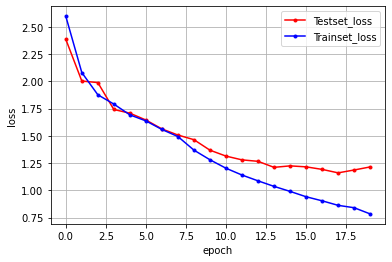

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()